# Lab 4: Data Visualization and EDA

#### CPE232 Data Models

---

1. Load all Superstore datasets.

*Note: The same datasets used in Lab 3*

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [51]:
# Write your code here
ss_order = pd.read_csv('./sources/Superstore/superstore_order.csv')
ss_people = pd.read_csv('./sources/Superstore/superstore_people.csv')
ss_return = pd.read_csv('./sources/Superstore/superstore_return.csv')

2. Determine shape of each dataset (print out the results as well).

In [52]:
# Write your code here
print(f"SuperStore Order's shape >> {ss_order.shape}")
print(f"SuperStore People's shape >> {ss_people.shape}")
print(f"SuperStore Return's shape >> {ss_return.shape}")

SuperStore Order's shape >> (8880, 21)
SuperStore People's shape >> (4, 2)
SuperStore Return's shape >> (296, 2)


3. Show information of the dataset.


In [53]:
# Write your code here
ss_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8880 non-null   int64  
 1   Order ID       8880 non-null   object 
 2   Order Date     8880 non-null   object 
 3   Ship Date      8880 non-null   object 
 4   Ship Mode      8880 non-null   object 
 5   Customer ID    8880 non-null   object 
 6   Customer Name  8880 non-null   object 
 7   Segment        8880 non-null   object 
 8   Country        8880 non-null   object 
 9   City           8880 non-null   object 
 10  State          8880 non-null   object 
 11  Postal Code    8880 non-null   int64  
 12  Region         8880 non-null   object 
 13  Product ID     8880 non-null   object 
 14  Category       8880 non-null   object 
 15  Sub-Category   8880 non-null   object 
 16  Product Name   8880 non-null   object 
 17  Sales          8880 non-null   float64
 18  Quantity

In [54]:
ss_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  4 non-null      object
 1   Region  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [55]:
ss_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


4. Are there any missing values? If so, in which column?

Ans: **There are no missing values in any column of any DataFrame because the Non-Null Count matches the maximum number of entries.**

5.
- 5.1 List unique segments
- 5.2 List unique segments and their corresponding count
- 5.3 Create a pie chart to demonstrate unique segments and their count
- 5.4 Briefly describe what could be interpreted from this pie chart

*Note: please create additional cells to answer 5.2 - 5.3*

In [56]:
# Write your code here (5.1)
print(ss_order['Segment'].unique())

['Consumer' 'Corporate' 'Home Office']


In [57]:
# Write your code here (5.2)
segment_count = ss_order['Segment'].value_counts()
print(segment_count)

Segment
Consumer       4613
Corporate      2673
Home Office    1594
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

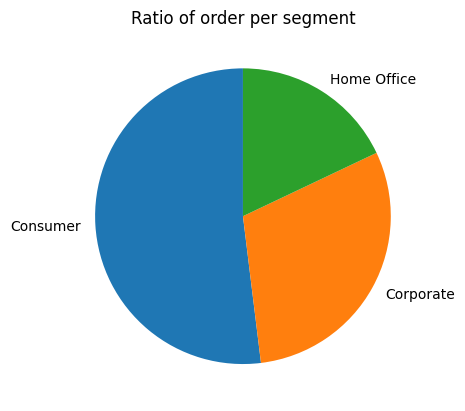

In [58]:
# Write your code here (5.3)
plt.pie(segment_count, labels = segment_count.index, startangle=90)
plt.title('Ratio of order per segment')
plt.show

Answer for the question 5.4

Ans: **From the pie chart, we can observe that the number of consumers segment was more than 50% in the superstore, making it the largest segment, followed by corporate and home office in descending order.**

6.
- 6.1 List unique states
- 6.2 List top-10 unique states and their corresponding count
- 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
- 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
- 6.5 Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

*Note: please create additional cells to answer 6.2 - 6.4*

In [59]:
# Write your code here (6.1)
print(ss_order['State'].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [60]:
# Write your code here (6.2)
state_count = ss_order['State'].value_counts()
state_count[:10]

State
California        1754
New York          1001
Texas              860
Pennsylvania       531
Washington         452
Illinois           427
Ohio               396
Florida            339
Michigan           230
North Carolina     229
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

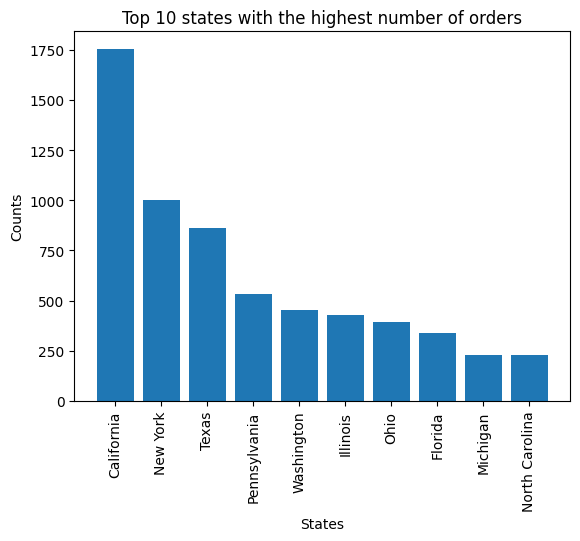

In [61]:
# Write your code here (6.3)
plt.bar(state_count[:10].index, state_count[:10])
plt.title('Top 10 states with the highest number of orders')
plt.xlabel('States')
plt.ylabel('Counts')

plt.xticks(rotation = 90)

plt.show

In [62]:
# Write your code here (6.4)
total_sales_by_state = ss_order.groupby('State')['Sales'].sum().loc[state_count[:10].index]
total_sales_by_state

State
California        399195.4555
New York          274866.8190
Texas             147855.0282
Pennsylvania      103852.5210
Washington        124497.7780
Illinois           71456.1780
Ohio               67924.2140
Florida            84083.0880
Michigan           62147.6960
North Carolina     49962.1580
Name: Sales, dtype: float64

Answer for the question 6.5

Ans: **From the results, I observe that California had the highest total sales, while North Carolina had the lowest, which seemed to correlate with the number of orders. On the other hand, Pennsylvania, which had more orders than Washington, showed lower total sales. Additionally, Florida had significantly higher total sales compared to states with similar number of orders**

7.
- 7.1 List unique categories
- 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
- 7.3 Compute the ratio of these categories in percentage and print the results

*Note: please create additional cells to answer 7.2 - 7.3*

In [63]:
# Write your code here (7.1)
print(ss_order['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


<function matplotlib.pyplot.show(close=None, block=None)>

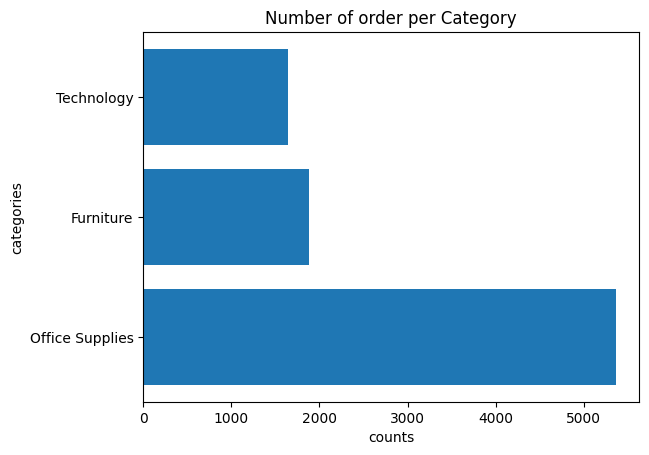

In [64]:
# Write your code here (7.2)
categories_count = ss_order['Category'].value_counts()

plt.barh(categories_count.index, categories_count)
plt.title('Number of order per Category')
plt.xlabel('counts')
plt.ylabel('categories')

plt.show

In [65]:
# Write your code here (7.3)
categories_ratio = categories_count / categories_count.sum() * 100

categories_ratio

Category
Office Supplies    60.360360
Furniture          21.171171
Technology         18.468468
Name: count, dtype: float64

8. Update the type of all columns that contain dates to *datetime* and show information after an update.

In [66]:
# write your code here
ss_order['Order Date'] = pd.to_datetime(ss_order['Order Date'], format="%d/%m/%Y")
ss_order['Ship Date'] = pd.to_datetime(ss_order['Ship Date'], format="%d/%m/%Y")

ss_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8880 non-null   int64         
 1   Order ID       8880 non-null   object        
 2   Order Date     8880 non-null   datetime64[ns]
 3   Ship Date      8880 non-null   datetime64[ns]
 4   Ship Mode      8880 non-null   object        
 5   Customer ID    8880 non-null   object        
 6   Customer Name  8880 non-null   object        
 7   Segment        8880 non-null   object        
 8   Country        8880 non-null   object        
 9   City           8880 non-null   object        
 10  State          8880 non-null   object        
 11  Postal Code    8880 non-null   int64         
 12  Region         8880 non-null   object        
 13  Product ID     8880 non-null   object        
 14  Category       8880 non-null   object        
 15  Sub-Category   8880 n

9. Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

*Hint: The duration starts as soon as the item has been ordered and ends once the order has successfully shipped.*

In [67]:
# write your code here
ss_order['Processing time day'] = ss_order['Ship Date'] - ss_order['Order Date']

ss_order['Processing time day']

0      3 days
1      3 days
2      4 days
3      7 days
4      7 days
        ...  
8875   6 days
8876   6 days
8877   6 days
8878   6 days
8879   2 days
Name: Processing time day, Length: 8880, dtype: timedelta64[ns]

10. Based on the result in 9.
- 10.1 How many orders are there that take more than 5 days to process?
- 10.2 Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
- 10.3 Plot the histogram based on the column Quantity

*Note: please create additional cells to answer 10.2 - 10.3*

In [68]:
# Write your code here (10.1)
long_shipping = ss_order[ss_order['Processing time day'].dt.days > 5]
long_shipping.shape[0]

1656

In [69]:
# Write your code here (10.2)
long_shipping.head(5)[['Order ID', 'Order Date', 'Ship Date', 'Processing time day', 'Quantity']]


,Order ID,Order Date,Ship Date,Processing time day,Quantity
3,US-2015-108966,2015-10-11,2015-10-18,7 days,5
4,US-2015-108966,2015-10-11,2015-10-18,7 days,2
16,CA-2014-105893,2014-11-11,2014-11-18,7 days,6
53,CA-2016-105816,2016-12-11,2016-12-17,6 days,7
54,CA-2016-105816,2016-12-11,2016-12-17,6 days,5


<function matplotlib.pyplot.show(close=None, block=None)>

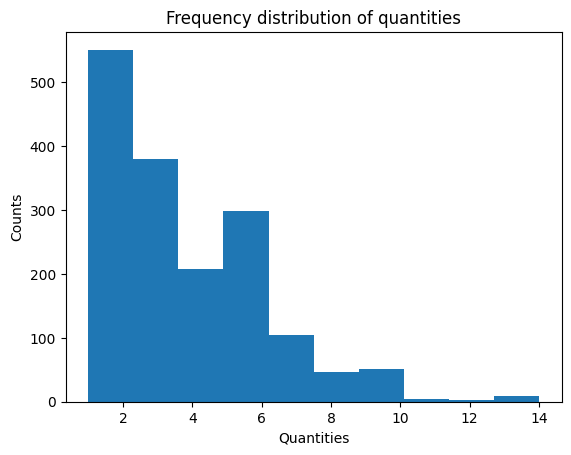

In [70]:
# Write your code here (10.3)
plt.hist(long_shipping.Quantity)
plt.title('Frequency distribution of quantities')
plt.xlabel('Quantities')
plt.ylabel('Counts')
plt.show

11. Total sales compare across different regions
  
- 11.1 Create a bar chart to visualize.

<function matplotlib.pyplot.show(close=None, block=None)>

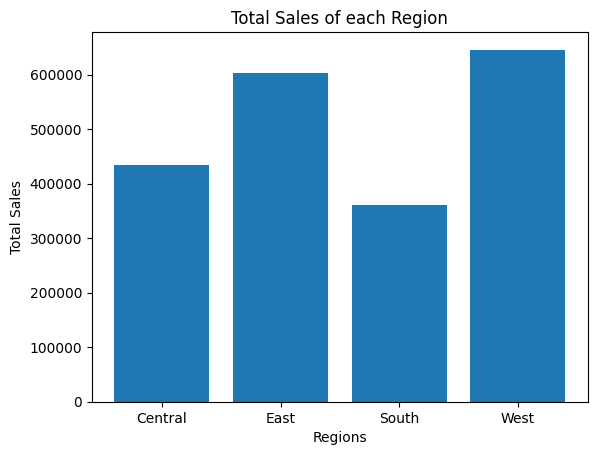

In [71]:
# Write your code here (11.1)
total_sales_by_regions = ss_order.groupby('Region')['Sales'].sum()

plt.bar(total_sales_by_regions.index, total_sales_by_regions)
plt.title('Total Sales of each Region')
plt.xlabel('Regions')
plt.ylabel('Total Sales')
plt.show

- 11.2 How do total sales compare across different regions? Explain in as much detail as possible.
  
  Ans: **The bar chart indicates that the West region achieved the highest total sales, followed by the East and Central regions, respectively. The South region recorded the lowest total sales among all regions.**

12.Which states have the highest number of returns? Use a horizontal bar chart.

Ans: **California clearly got the highest number of returns.**

Text(0, 0.5, 'state')

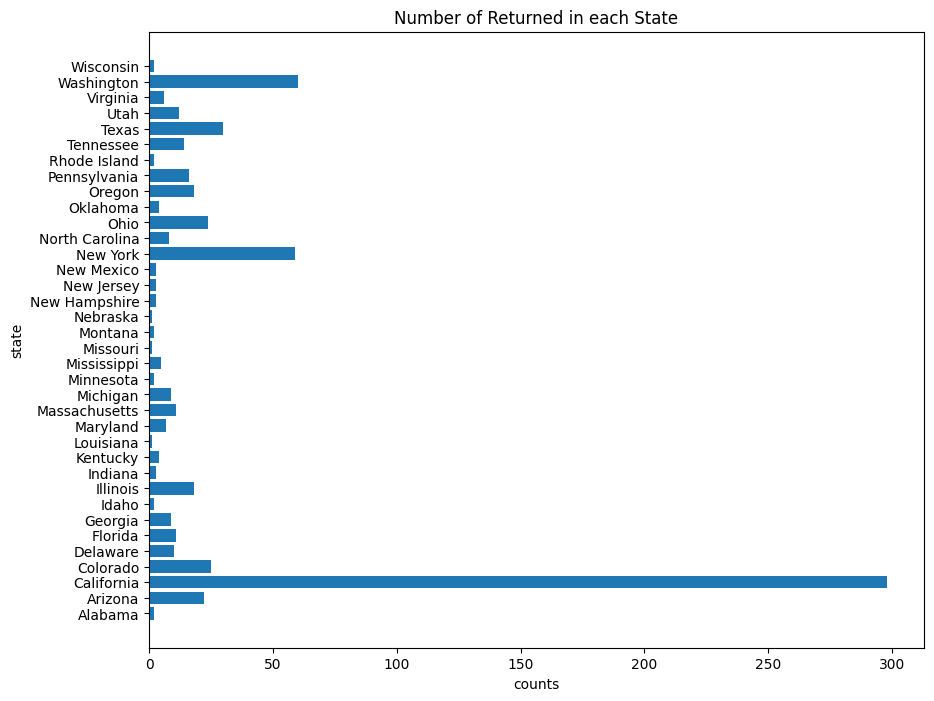

In [72]:
# Write your code here (12)
order_return = ss_return.merge(ss_order, on='Order ID', how='inner')
return_by_state = order_return.groupby('State')['Returned'].count()

plt.figure(figsize=(10, 8))
plt.barh(return_by_state.index, return_by_state)
plt.title('Number of Returned in each State')
plt.xlabel('counts')
plt.ylabel('state')


13. What is the correlation between numerical variables in the superstore_order dataset? Use a heatmap
*Hint: Use seaborn to create a heatmap :)*

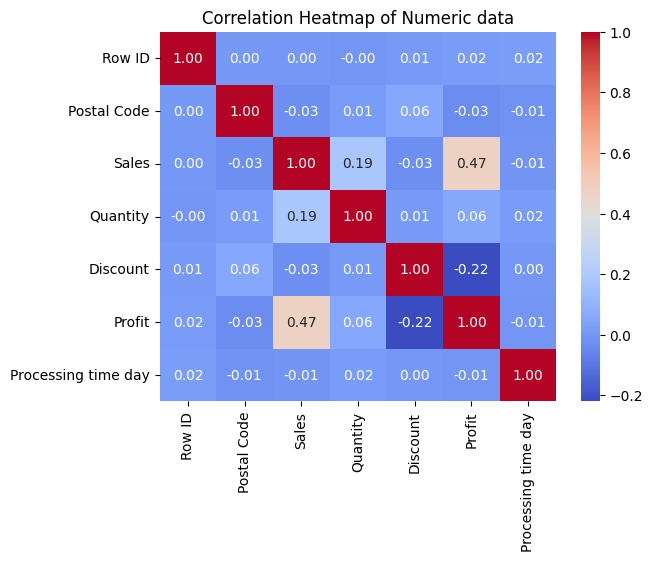

In [73]:
# Write your code here (13)
numeric_data = ss_order.select_dtypes(include=['number'])

correlate_data = numeric_data.corr()

plt.title('Correlation Heatmap of Numeric data')
sns.heatmap(correlate_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

14. Create a USA State-Level Choropleth Map to visualize total sales per state.

*   The darkest color represents the highest total sales.
*   The lightest color represents the lowest total sales.
*   Use a continuous gradient scale (e.g., dark blue to light blue, dark red to light red, or any custom gradient of your choice).

*Hint: Use plotly.express*

In [74]:
us_state = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
}

In [75]:
# Write your code here (14)
ss_order['State Code'] = ss_order['State'].map(us_state)

total_sales_by_state = ss_order.groupby('State Code')['Sales'].sum().reset_index()

fig = px.choropleth(
    total_sales_by_state,
    locations="State Code",
    locationmode="USA-states",
    color="Sales",
    color_continuous_scale="Reds",
    title="Total Sales Per State (USA)",
    scope="usa"
)

fig.show()

  14.2 Answer the following questions:
1.   Which state has the highest total sales?
2.   How do sales anomalies affect the gradient color shading on the map?
3.   If you change the color scale, does it impact readability? Why or why not?

Ans:


**1. California.**

**2. Exceptionally high total sales, such as in California, can cause other states to appear in lighter shades of red, making it difficult to observe differences among them.**

**3. Yes, using a color scale that accurately reflects the data values can effectively highlight variations and patterns, making the visualization more informative and easier to interpret. In other ways we can using log transform to make it cleary differences.**


In [76]:
# using log scale
ss_order['State Code'] = ss_order['State'].map(us_state)

total_sales_by_state = ss_order.groupby('State Code')['Sales'].sum().reset_index()
total_sales_by_state['Log Sales'] = np.log1p(total_sales_by_state['Sales'])

fig = px.choropleth(
    total_sales_by_state,
    locations="State Code",
    locationmode="USA-states",
    color="Log Sales",
    color_continuous_scale="Reds",
    title="Total Sales Per State (USA) - Log Scale",
    scope="usa"
)

fig.show()

15. Create a box plot to compare the different shipping modes based on total profit.

In [77]:
#Write your code here (15)

fig = px.box(ss_order, x='Ship Mode', y='Profit', title='Distrubution of profit per shipping method')
fig.show()

15.2 Which shipping mode has the highest median profit?

Ans: **Second Class, which got 9.7608**

[BONUS 20 pts] Determine the percentage of customers who:
- B1)returned the product once
- B2) returned the product at least once
- B3) never returned the product
- Finally, Plot a comparison of B2 and B3

*Note: please create additional cells to answer the above points*

In [78]:
total_customer = len(ss_order['Customer ID'].unique())
total_customer

789

In [79]:
return_order = ss_order.merge(ss_return, on='Order ID', how='left').fillna('No')

return_order['Returned'] = return_order['Returned'].apply(lambda x: 1 if x == 'Yes' else 0)

costumer_return_counts = return_order.groupby('Customer ID')['Returned'].sum()
costumer_return_counts

Customer ID
AA-10315    0
AA-10375    0
AA-10480    0
AA-10645    1
AB-10015    0
           ..
XP-21865    3
YC-21895    1
YS-21880    0
ZC-21910    4
ZD-21925    3
Name: Returned, Length: 789, dtype: int64

In [80]:
# Write your code here B1
num_customer_returned_once = costumer_return_counts[costumer_return_counts == 1].count()
print(f'B1) Percentage of customers who returned the product once : {num_customer_returned_once / total_customer * 100} %')

B1) Percentage of customers who returned the product once : 7.858048162230672 %


In [81]:
# Write your code here B2
num_customer_returned_least_once = costumer_return_counts[costumer_return_counts >= 1].count()
print(f'B2) Percentage of customers who returned the product at least once : {num_customer_returned_least_once / total_customer * 100} %')

B2) Percentage of customers who returned the product at least once : 28.13688212927757 %


In [82]:
# Write your code here B3
num_customer_never_returned = costumer_return_counts[costumer_return_counts == 0].count()
print(f'B3) Percentage of customers who never returned the product : {num_customer_never_returned / total_customer * 100} %')

B3) Percentage of customers who never returned the product : 71.86311787072243 %


<function matplotlib.pyplot.show(close=None, block=None)>

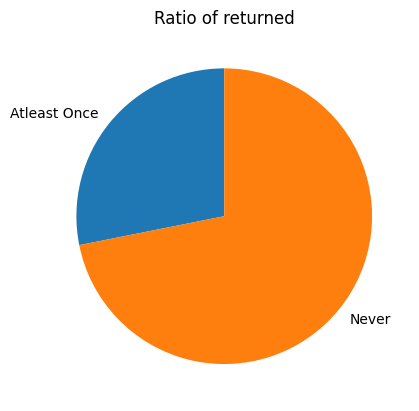

In [83]:
costumer_return_counts = [num_customer_returned_least_once, num_customer_never_returned]
label = ['Atleast Once', 'Never']

plt.pie(costumer_return_counts, labels=label, startangle=90)
plt.title('Ratio of returned')
plt.show